# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [37]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
sum_year = data.groupby('year')['passengers'].sum().reset_index() #按年份对passengers求和
sum_year.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


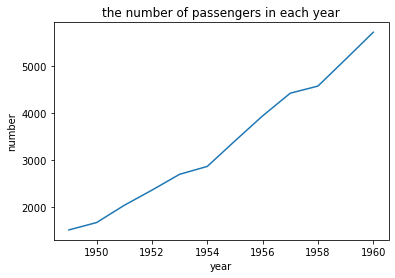

In [39]:
#画出折线图
plt.plot(sum_year['year'],sum_year['passengers'])
plt.xlabel('year')
plt.ylabel('number')
plt.title('the number of passengers in each year')
plt.show()

In [40]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['month'] = data['month'].map(month_mapping)#创建一个字典，通过map()函数将月份的英文缩写转换为数字
data.head()
sum_month= data.groupby('month')['passengers'].sum().reset_index() #按月份对passengers求和
sum_month.head()

,month,passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


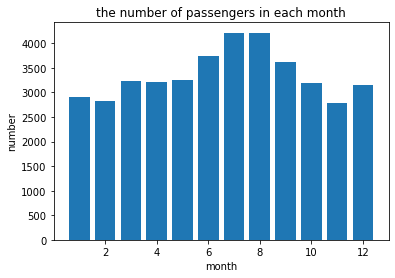

In [41]:
plt.bar(sum_month['month'],sum_month['passengers'])
plt.xlabel('month')
plt.ylabel('number')
plt.title('the number of passengers in each month')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [146]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


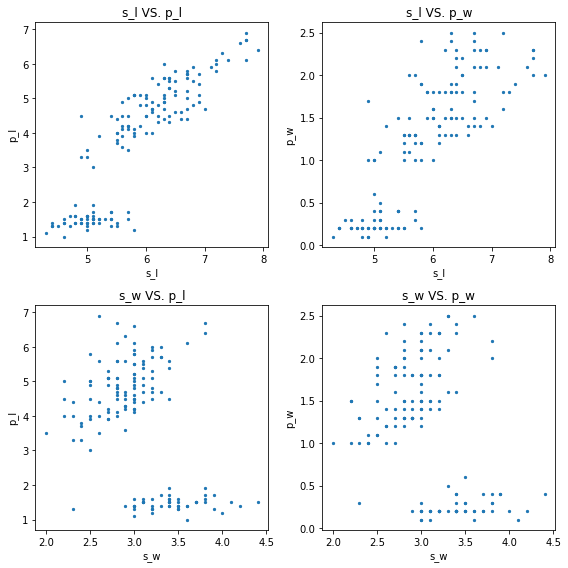

In [80]:

fig, axs = plt.subplots(2, 2,figsize=(8,8))# 创建包含四个子图的图形

axs[0,0].scatter(data['sepal_length'],data['petal_length'],s= 5)
axs[0,0].set_xlabel('s_l')
axs[0,0].set_ylabel('p_l')
axs[0,0].set_title('s_l VS. p_l')

axs[0,1].scatter(data['sepal_length'],data['petal_width'],s= 5)
axs[0,1].set_xlabel('s_l')
axs[0,1].set_ylabel('p_w')
axs[0,1].set_title('s_l VS. p_w')

axs[1,0].scatter(data['sepal_width'],data['petal_length'],s= 5)
axs[1,0].set_xlabel('s_w')
axs[1,0].set_ylabel('p_l')
axs[1,0].set_title('s_w VS. p_l')

axs[1,1].scatter(data['sepal_width'],data['petal_width'],s= 5)
axs[1,1].set_xlabel('s_w')
axs[1,1].set_ylabel('p_w')
axs[1,1].set_title('s_w VS. p_w')

plt.tight_layout()

plt.show()

In [102]:
#按种类分为四个Data
data_species = data.groupby('species')

data_setosa = data_species.get_group('setosa')

data_verscicolor = data_species.get_group('versicolor')

data_virginica = data_species.get_group('virginica')

data_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 0, 'Features of the setosa flowers')

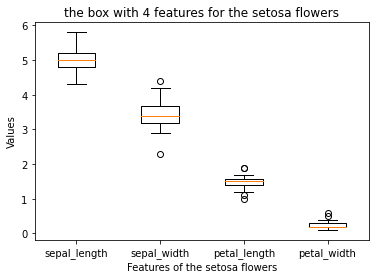

In [132]:
plt.boxplot(data_setosa.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the setosa flowers')
plt.ylabel('Values')
plt.xlabel('Features of the setosa flowers')

Text(0.5, 0, 'Features of the verscicolor flowers')

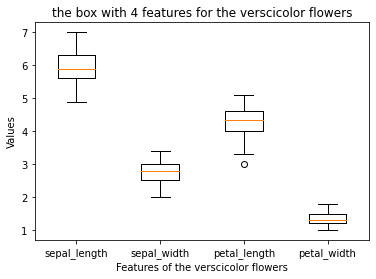

In [131]:
plt.boxplot(data_verscicolor.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the verscicolor flowers')
plt.ylabel('Values')
plt.xlabel('Features of the verscicolor flowers')

Text(0.5, 0, 'Features of the virginica flowers')

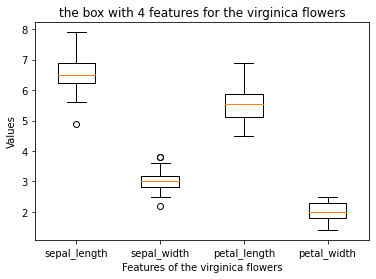

In [133]:
plt.boxplot(data_virginica.iloc[:,0:4],labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('the box with 4 features for the virginica flowers')
plt.ylabel('Values')
plt.xlabel('Features of the virginica flowers')

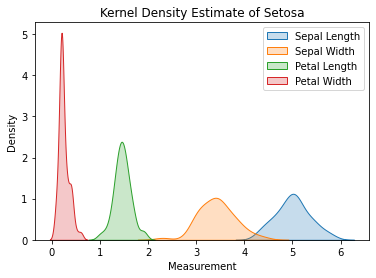

In [157]:
#Setosa的核密度估计
sns.kdeplot(data=data_setosa['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_setosa['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_setosa['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_setosa['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Setosa')
plt.legend()
plt.show()

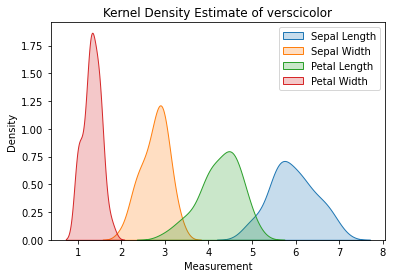

In [158]:
#verscicolor的核密度估计
sns.kdeplot(data=data_verscicolor['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_verscicolor['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_verscicolor['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_verscicolor['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Verscicolor')
plt.legend()
plt.show()

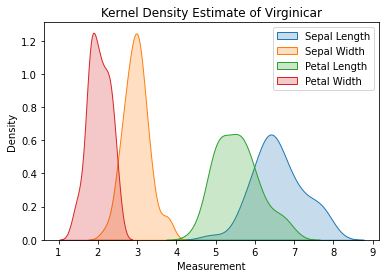

In [159]:
#virginica的核密度估计
sns.kdeplot(data=data_virginica['sepal_length'], label='Sepal Length', shade=True)
sns.kdeplot(data=data_virginica['sepal_width'], label='Sepal Width', shade=True)
sns.kdeplot(data=data_virginica['petal_length'], label='Petal Length', shade=True)
sns.kdeplot(data=data_virginica['petal_width'], label='Petal Width', shade=True)

plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Virginicar')
plt.legend()
plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [134]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


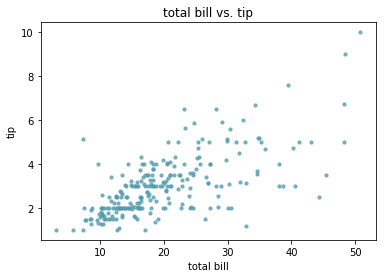

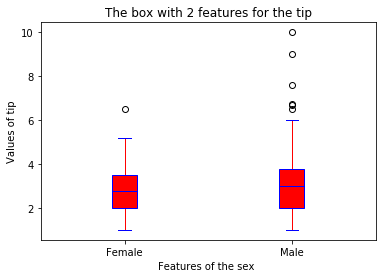

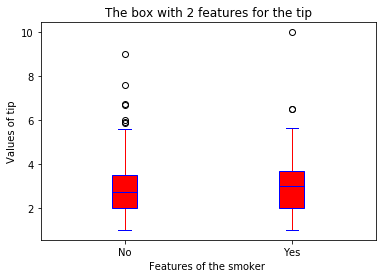

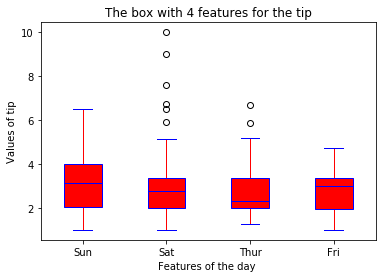

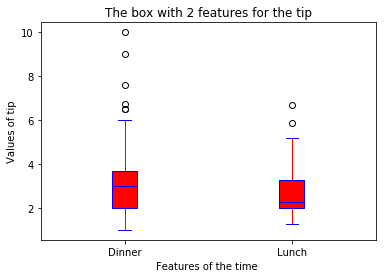

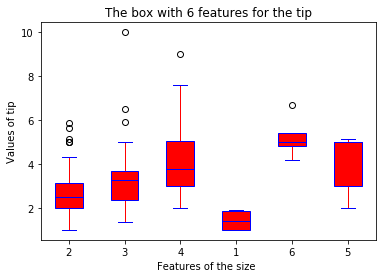

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


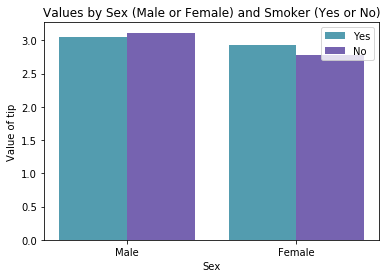

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [6]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


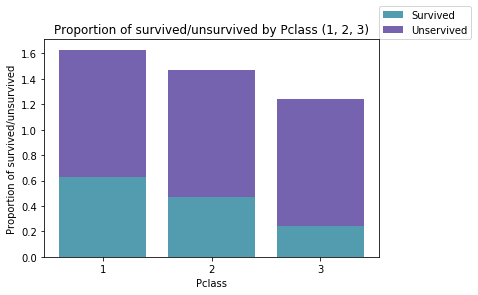

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


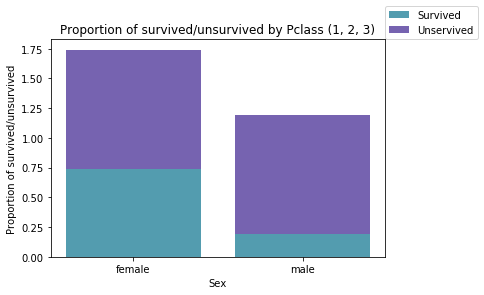

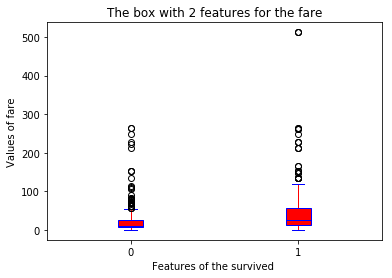

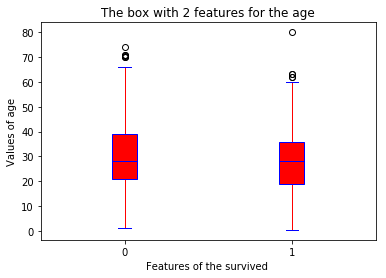

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


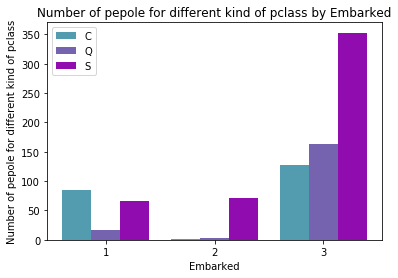

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

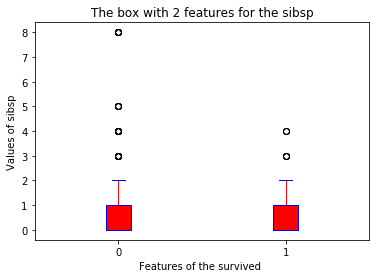

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

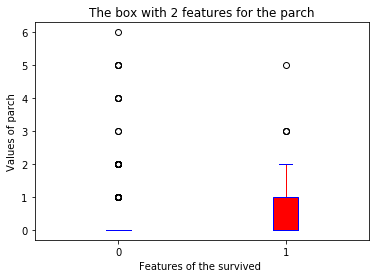

survived    0    1
alone             
False     175  179
True      374  163


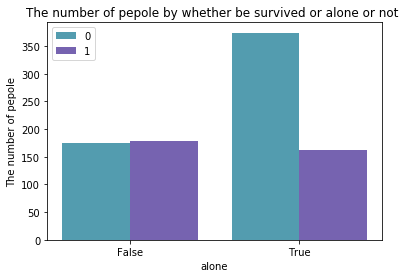